# **Bank Churn Prediction -:**

## TABLE OF CONTENTS

1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA VISUALIZATION AND CLEANINGS

4. DATA PREPROCESSING

5. MODEL BUILDING

6. CONCLUSION

7. END

## *IMPORTING LIBRARIES*

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

## *LOADING DATA*

In [2]:
import pandas as pd
df = pd.read_csv('bank churn train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


#### About the data:

The dataset contains about churn of bank customer.

In this project, I will use this data to predict whether or not the customer is exited or stay.
There are 14 attributes including the target variable "Exited", indicating whether or not the customer is exited or stay.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100001 non-null  int64  
 1   CustomerId       100001 non-null  int64  
 2   Surname          100001 non-null  object 
 3   CreditScore      100001 non-null  int64  
 4   Geography        100001 non-null  object 
 5   Gender           100001 non-null  object 
 6   Age              100001 non-null  float64
 7   Tenure           100001 non-null  int64  
 8   Balance          100001 non-null  float64
 9   NumOfProducts    100001 non-null  int64  
 10  HasCrCard        100001 non-null  int64  
 11  IsActiveMember   100001 non-null  int64  
 12  EstimatedSalary  100001 non-null  float64
 13  Exited           100001 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 10.7+ MB


### Points to notice:

- There are no missing values in the dataset

- Dataset includes numeric and categorical values

## *DATA VISUALIZATION AND CLEANINGS*

### Steps involves in this section:

- Count plot of target column

- Correlation amongst numeric attributes

- Encoding Geography and Gender as continuous features

<Axes: xlabel='Exited', ylabel='count'>

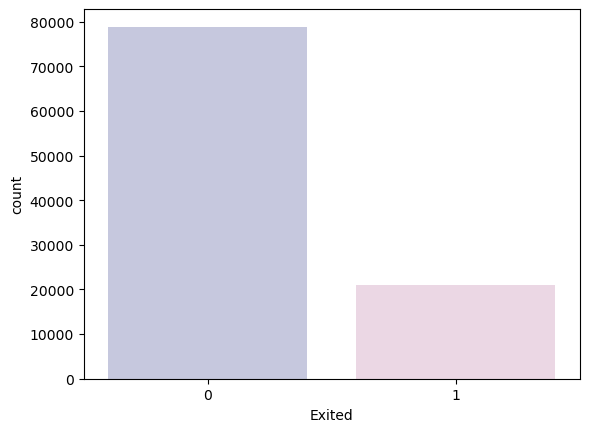

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df["Exited"], palette= cols)

<Axes: >

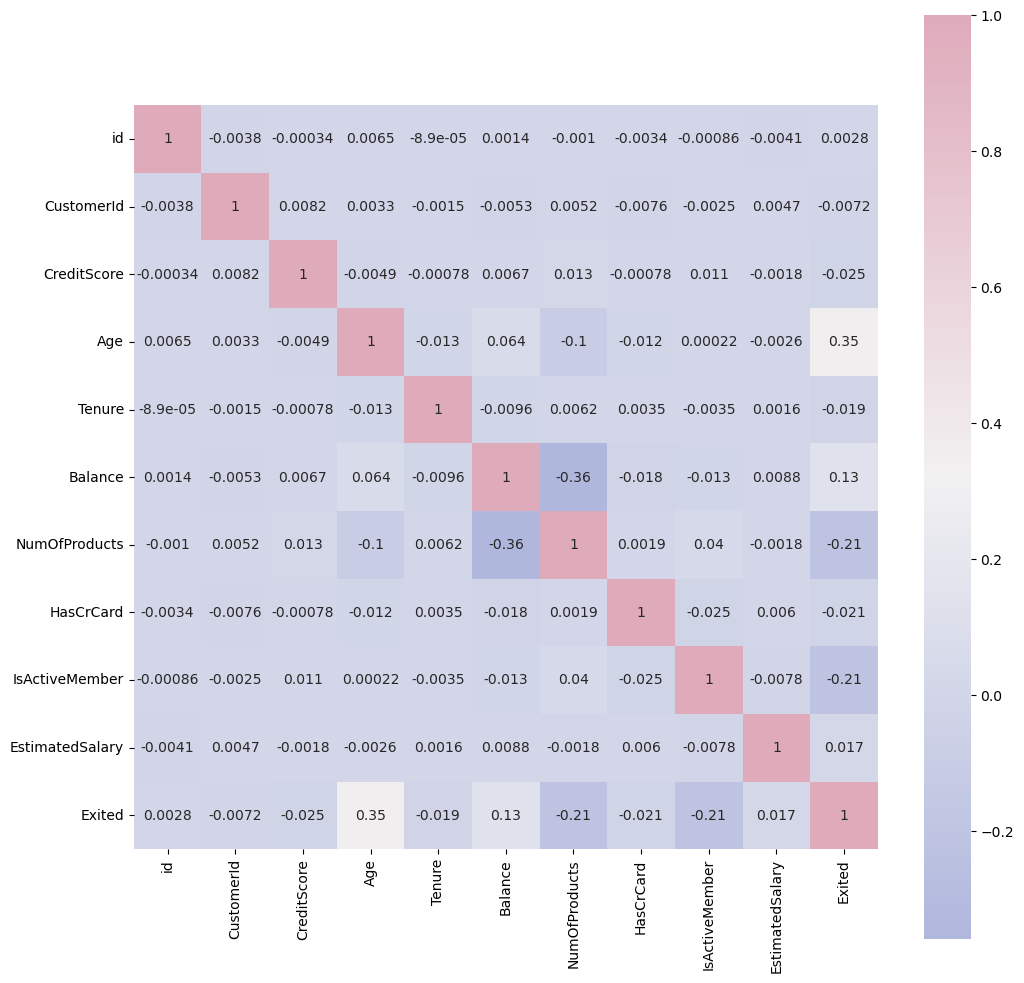

In [5]:
# Correlation amongst numeric attributes
df1 = df.drop(['Gender','Gender','Geography','Surname'], axis=1)
corrmat = df1.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [6]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


### Categorical Variables
- Filling missing values with mode of the column value

In [7]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Surname', 'Geography', 'Gender']


In [8]:
# Missing values in categorical variables

for i in object_cols:
    print(i, df[i].isnull().sum())

Surname 0
Geography 0
Gender 0


*Here we can see there is no missing values so no need to fill values*

### Numerical variables

- Filling missing values with median of the column value

In [9]:
# Get list of neumeric variables
float_col = (df.dtypes == "float64")
num_cols = list(float_col[float_col].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['Age', 'Balance', 'EstimatedSalary']


In [10]:

for i in num_cols:
    print(i, df[i].isnull().sum())

Age 0
Balance 0
EstimatedSalary 0


In [11]:
# Get list of neumeric variables
int_col = (df.dtypes == "int64" )
int_num_cols = list(int_col[int_col].index)

print("Neumeric variables:")
print(int_num_cols)

Neumeric variables:
['id', 'CustomerId', 'CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [12]:

for i in int_num_cols:
    print(i, df[i].isnull().sum())

id 0
CustomerId 0
CreditScore 0
Tenure 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
Exited 0


*Here we can see this numric fields also does not have null values*

## DATA PREPROCESSING


### Steps involved in Data Preprocessing:

- Dropping unnecessary colunms
- Label encoding columns with categorical data
- Perform the scaling of the features
- Detecting outliers
Dropping the outliers based on data analysis


In [13]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


### *Dropping unnecessary colunms*

In [14]:
drop_col = ['id','CustomerId','Surname']
df.drop(drop_col, axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


### *Label encoding the catagorical varable*

In [15]:
# Apply label encoder to each column with categorical data
obj_labl = ['Gender', 'Geography']
label_encoder = LabelEncoder()
for i in obj_labl:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      100001 non-null  int64  
 1   Geography        100001 non-null  int32  
 2   Gender           100001 non-null  int32  
 3   Age              100001 non-null  float64
 4   Tenure           100001 non-null  int64  
 5   Balance          100001 non-null  float64
 6   NumOfProducts    100001 non-null  int64  
 7   HasCrCard        100001 non-null  int64  
 8   IsActiveMember   100001 non-null  int64  
 9   EstimatedSalary  100001 non-null  float64
 10  Exited           100001 non-null  int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 7.6 MB


### *Perform the scaling of the features*

In [16]:
# Prepairing attributes of scale data

features = df.drop('Exited', axis=1) # dropping target and extra columns

target = df['Exited']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,100001.0,-3.032211e-16,1.000005,-3.817829,-0.740992,0.031332,0.666631,2.410587
Geography,100001.0,1.502783e-17,1.000005,-0.793050,-0.793050,-0.793050,0.432204,1.657459
Gender,100001.0,-1.257648e-16,1.000005,-1.136534,-1.136534,0.879868,0.879868,0.879868
Age,100001.0,3.648956e-16,1.000005,-2.276960,-0.691978,-0.125912,0.440153,6.100803
Tenure,100001.0,-7.872735e-17,1.000005,-1.791126,-0.722325,-0.009790,0.702744,1.771546
Balance,100001.0,1.786997e-17,1.000005,-0.884676,-0.884676,-0.884676,1.024095,3.111555
NumOfProducts,100001.0,8.284845e-17,1.000005,-1.011713,-1.011713,0.814337,0.814337,4.466438
HasCrCard,100001.0,-1.330123e-16,1.000005,-1.757180,0.569094,0.569094,0.569094,0.569094
IsActiveMember,100001.0,-5.002171e-17,1.000005,-0.994943,-0.994943,-0.994943,1.005083,1.005083
EstimatedSalary,100001.0,-2.781214e-16,1.000005,-2.235121,-0.754282,0.108930,0.851495,1.737090


### *Detecting outliers*

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

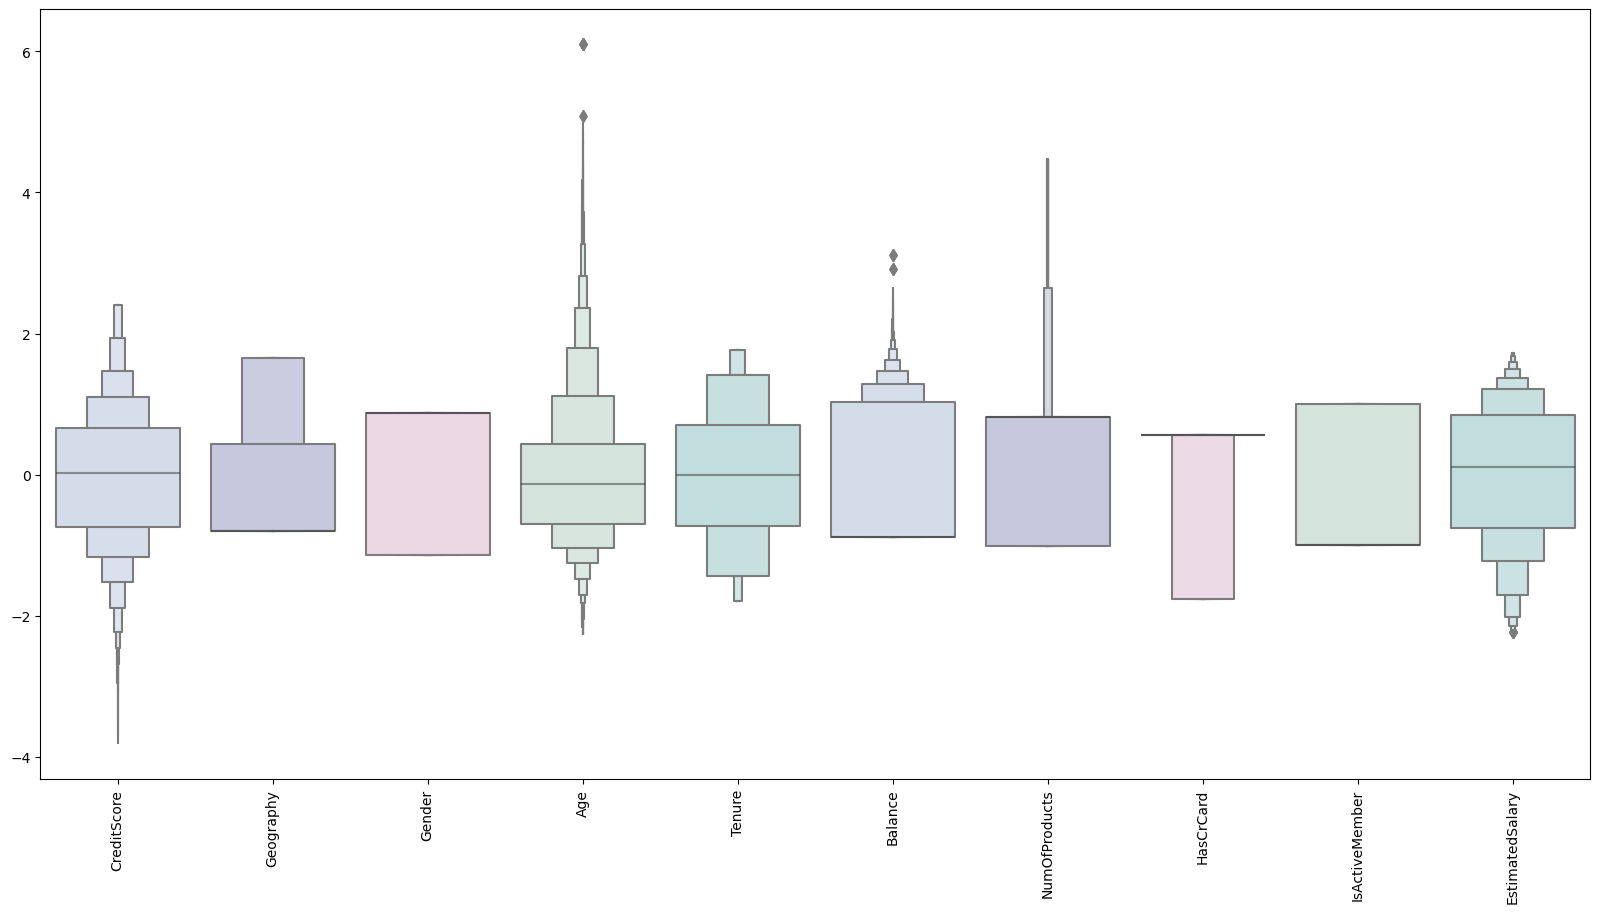

In [17]:
import warnings
# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

- Here we can see there are no outliers so just start building our model 

## MODEL BUILDING

### In this section, we build an Random forest Classifier Model

#### Following steps are involved in the model building

1. Assining X and y the status of attributes and tags
2. Splitting test and training sets
3. Initialising the Random forest Classifier Model
4. Hyper Parameter tuining
5. Test Model
6. Evaluate model
7. Prediction


In [18]:
# print("Shape of X_train: ",X_train.shape)
# print("Shape of X_test: ",X_test.shape)
# print("Shape of y_train: ",y_train.shape)
# print("Shape of y_test: ",y_test.shape)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1,0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1,1,49503.50,0
2,678,0,1,40.0,10,0.00,2,1,0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0
4,716,2,1,33.0,5,0.00,2,1,1,15068.83,0


In [20]:
x = df.drop('Exited', axis=1)
y = df['Exited']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
print("Shape of xtrain: ",xtrain.shape)
print("Shape of xtest: ",xtest.shape)
print("Shape of ytrain: ",ytrain.shape)
print("Shape of ytest: ",ytest.shape)

Shape of xtrain:  (70000, 10)
Shape of xtest:  (30001, 10)
Shape of ytrain:  (70000,)
Shape of ytest:  (30001,)


In [22]:
# Training the Random Forest model
rf_classifier = RandomForestClassifier()

In [23]:
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [24]:
rf_classifier.score(xtest,ytest)

0.8560714642845239

In [25]:
model = RandomForestClassifier()

In [26]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10,20],
    'min_samples_leaf': [1, 2, 4],
}

In [27]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=  12.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  26.9s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  27.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  25.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  22.3s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  22.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  37.0s
[CV] END max_depth=None, min_samples_leaf

[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=150; total time=  36.1s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=150; total time=  35.7s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=150; total time=  35.5s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=150; total time=  36.4s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  11.3s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  11.9s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  10.5s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  12.9s
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  12.6s
[CV] END .max_depth=20, min_samples_leaf=2, n_estimators=100; total time=  26.0s
[CV] END .max_depth=20, min_samples_leaf=2, n_estimators=100; total time=  25.4s
[CV] END .max_depth=20, min_samples_leaf=2, n_estimators=100; total time=  22.3s
[CV] END .max_depth=20, min_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [28]:
grid_search.score(xtest, ytest)

0.8605379820672644

## CONCLUSION

## Concluding the model with:

- Testing on the test set
- Evaluating the confusion matrix
- Evaluating the classification report

In [30]:
# Predicting the test set results
y_pred = grid_search.predict(xtest)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

<Axes: >

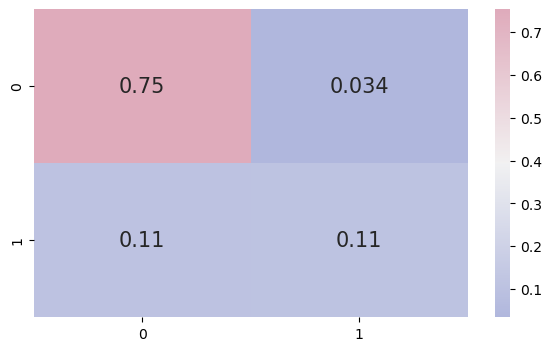

In [35]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(7,4))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [37]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     23621
           1       0.76      0.50      0.61      6380

    accuracy                           0.86     30001
   macro avg       0.82      0.73      0.76     30001
weighted avg       0.85      0.86      0.85     30001



In [49]:

# Function to preprocess input data and make predictions
def predict_customer_churn(input_data):
    # Making the prediction
    features = input_data.drop(["id", "CustomerId", "Surname"], axis=1)

    grid_search.predict(features)
    if pre == 1:
        return "Churn Prediction: The customer is likely to exit."
    else:
        return "Churn Prediction: The customer is likely to stay."

# Example usage
input_data = {
    "id":5,
    "CustomerId":"15674932",
    "Surname":"Okwudilichukwu",
    "CreditScore": 650,
    "Geography": 1,  # Options: "France", "Spain", "Germany"
    "Gender": 1,  # Options: "Male", "Female"
    "Age": 40,
    "Tenure": 5,
    "Balance": 120000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 100000
}

In [52]:
# Convert input data to DataFrame for prediction
input_df = pd.DataFrame([input_data])
pre = predict_customer_churn(input_df)
print(pre)

Churn Prediction: The customer is likely to stay.
